<a href="https://colab.research.google.com/github/jvjnagar/Machine-Learning/blob/main/ML_Algorihtms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression From Scratch**

ref:
https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2#:~:text=For%20Linear%20Regression%2C%20we%20had,number%20between%200%20and%201.

ref2:
https://math.stackexchange.com/questions/2503428/derivative-of-binary-cross-entropy-why-are-my-signs-not-right

In [ ]:
import sklearn
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

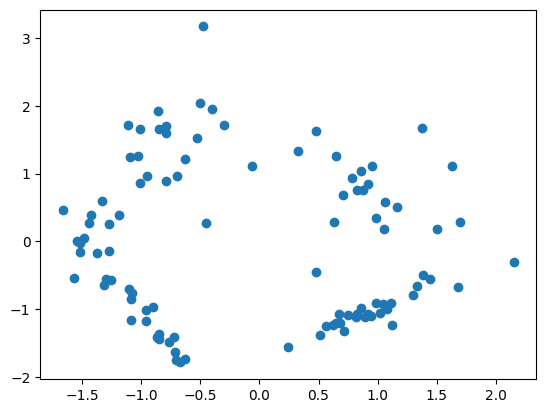

In [ ]:
x, y = make_classification(n_features=2, n_redundant=0,
                           n_informative=2, random_state=1,
                           n_classes=2)
plt.scatter(x[:,0], x[:,1])

In [ ]:
##### z = w.x + b #####
def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

##### cost function, binary cross entropy ####
def loss(y, y_hat):
  loss = -np.mean(y*np.log(y_hat) - (1-y)*np.log(1-y_hat))
  return loss

##### gradient decent ####

def gradient(x,y, y_hat ):
    # x --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).

    # m-> number of training examples.

    m = x.shape[0]
    dw = 1/m*np.dot(x.T, (y_hat-y))
    db = 1/m*np.sum(y_hat-y)
    return dw, db

def normalize(x):
  for i in range(x.shape[1]):
    x[:,i] = (x[:,i]-x[:,i].mean(axis=0))/x[:,i].std(axis=0)
  return x

def train(x, y, bs, epochs, lr):
  m,n = x.shape
  ## initialization of weights
  w = np.zeros((n,1))
  b = 0

  ### normalize the data
  x = normalize(x)

  # Empty list to store losses.
  losses = []
  for epoch in range(epochs):
    for i in range((m-1)//bs+1):
      start_i = i*bs
      end_i = (i+1)*bs
      Xbs = x[start_i:end_i]
      Ybs = y[start_i:end_i]
      z = np.dot(Xbs,w) + b
      Y_hat = sigmoid(z)
      dw, db = gradient(Xbs,Ybs, Y_hat )
      w -= lr*dw
      b -= lr*

    loss = loss(y, sigmoid(np.dot(x, w)+b))
    losses.append(loss)
  return w, b, losses

SyntaxError: ignored

In [ ]:
def predict(x, w,b ):
  x = normalize(x)
  y_pred = sigmoid(np.dot(x,w)+b)
  pred_class = []
  pred_class = [1 if i > 0.5 else 0 for i in y_pred]
  return np.array(pred_class)

[[ 1.30022717 -0.7856539 ]
 [ 1.44184425 -0.56008554]
 [-0.84792445 -1.36621324]
 [-0.72215015 -1.41129414]
 [-1.27221465  0.25945106]
 [ 0.78694271  0.94294879]
 [ 0.81695766 -1.12478707]
 [ 1.6822707  -0.67596877]
 [-1.07223343 -0.7701513 ]
 [-0.06539297  1.11257376]
 [-1.33232952  0.60245671]
 [-0.6963714   0.96382716]
 [ 0.82340614  0.7561926 ]
 [-1.5155534  -0.15804853]
 [-0.78971776  1.70347973]
 [ 0.85887841  1.04457966]
 [-0.45001335  0.27345841]
 [ 0.7099324   0.69020919]
 [-0.79095935  1.60495551]
 [-1.08077536 -1.15530746]
 [-1.5691733  -0.54054806]
 [-0.52568843  1.52568161]
 [-1.27406042 -0.1434304 ]
 [ 0.89621114 -1.11509679]
 [-0.85259895 -1.42554982]
 [-0.63262806  1.2217558 ]
 [-0.86447712 -1.40921978]
 [-0.47819102  3.17462483]
 [-1.25230004 -0.57685918]
 [-0.84475639 -1.44303438]
 [ 1.07510938 -1.00137091]
 [-0.95126327  0.9659913 ]
 [-1.09530458  1.23965215]
 [ 0.48229726  1.62411168]
 [-0.502186    2.05132133]
 [-1.54398637  0.01188478]
 [-1.08864222 -0.85261295]
 